In [7]:
from llmcoder.utils import get_config_dir, get_system_prompt_dir, get_data_dir
from llmcoder.eval.evaluate import Evaluation

import os
from dynaconf import Dynaconf

In [7]:
config = Dynaconf(settings_files=[os.path.join(get_config_dir(), "plain.yaml")])

In [3]:
eval = Evaluation(config)

In [4]:
results = eval.run(verbose=True)

Evaluation: 100%|██████████| 96/96 [1:07:33<00:00, 42.22s/it]   
/home/psaegert/miniconda3/envs/llmcoder/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Analysis:  10%|█         | 10/96 [00:18<01:58,  1.38s/it]/home/psaegert/miniconda3/envs/llmcoder/lib/python3.11/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/psaegert/miniconda3/envs/llmcoder/lib/python3.11/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-g

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import os

In [9]:
df_list = [pd.read_csv(os.path.join(get_data_dir("eval"), filename), index_col=0) for filename in os.listdir(get_data_dir("eval")) if filename.endswith(".csv")]
df_filename_list = [filename for filename in os.listdir(get_data_dir("eval"))]
# Extract the config name from the filename, e.g. "plain_w_sys", from "results_plain_w_sys_2023-11-28_21-22-17.csv"
pattern = r"results_(.+)_\d{4}-\d{2}-\d{2}_\d{2}-\d{2}-\d{2}.csv"
config_name_list = [re.search(pattern, filename) for filename in df_filename_list]
config_name_list = [match.group(1) for match in config_name_list if match is not None]

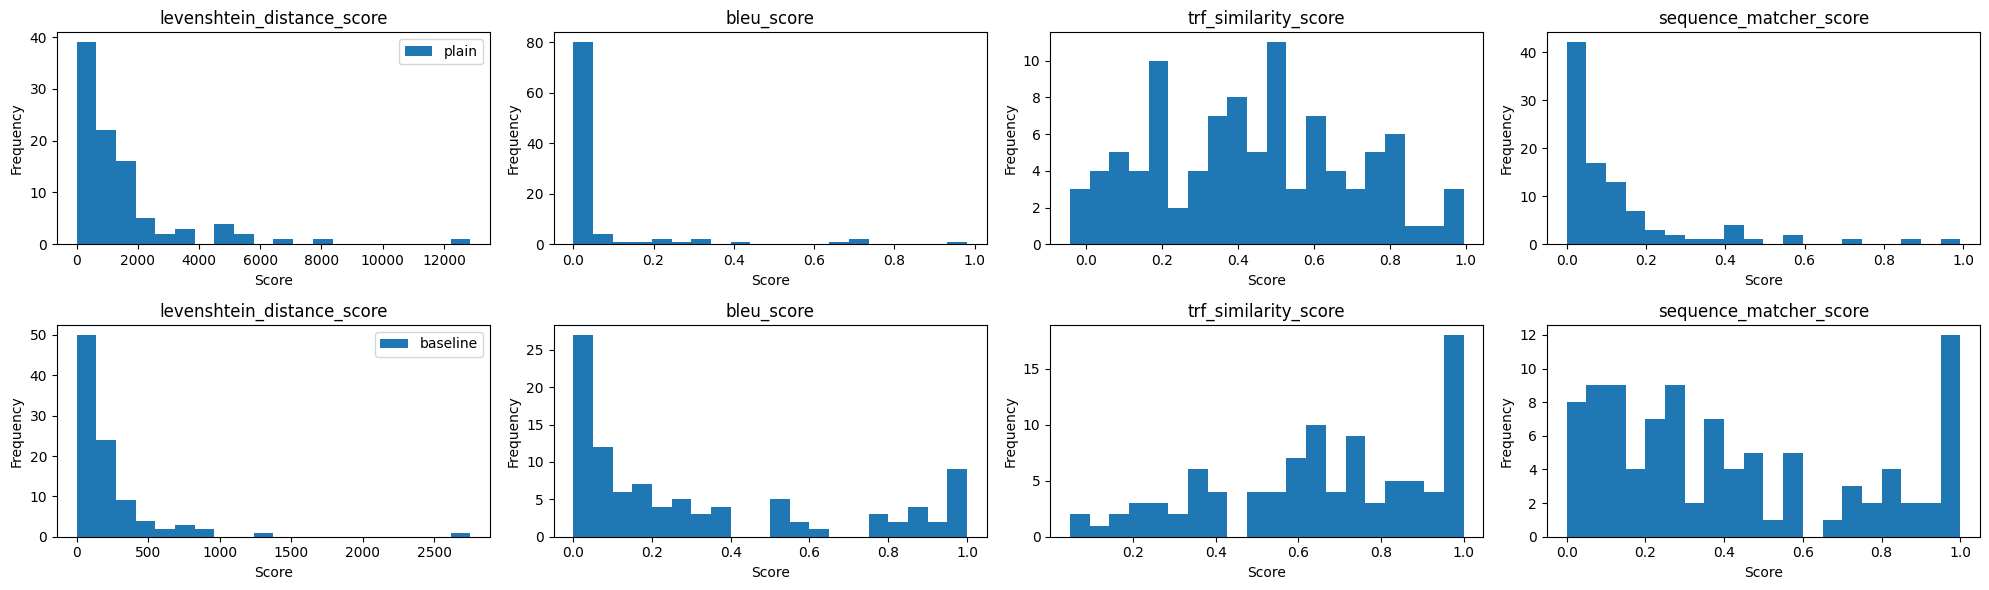

In [14]:
fig, axes = plt.subplots(len(df_list), len(df_list[0].columns), figsize=(len(df_list[0].columns) * 5, len(df_list) * 3))

for (df, axes_row, config_name) in zip(df_list, axes, config_name_list):
    for i, (col, ax) in enumerate(zip(df.columns, axes_row)):
        ax.hist(df[col], bins=20, label=config_name if i == 0 else None)
        ax.set_title(col)
        ax.set_xlabel('Score')
        ax.set_ylabel('Frequency')

        if i == 0:
            ax.legend()

plt.tight_layout()